# Analisis SIMCE en el rendimiento escolar en Chile

El Sistema de Medicion de Calidad de la Educacion o SIMCE, fue creado en 1968 como prueba estandarizada administrada por el ministerio de educacion para evaluar a los estudiantes de Chile y determinar su rendimiento y calidad academica. Nuestra motivacion existe en investigar las posibles disparidades del sistema de educacion usando bases de datos publicas del gobierno y asi saber que areas clave necesitan un enfoque de efuerzos para potencialmente mejorar el nivel de educacion.

Con nuestro proyecto no solo queremos comparar la calidad de educacion a traves de los años, si no que tambien ver si existe alguna correlacion entre el nivel de formacion y que tan vulnerable sea un sector.

Para cumplir nuestros objetivos dejamos guardados para en el analisis **6 archivos** conteniendo varios datos para extraer que nos serviran para el analisis conteniendo los siguientes cursos:

- `Cuartos Basicos 2014`
- `Cuartos Basicos 2016`
- `Cuartos Basicos 2022`
- `Sextos Basicos 2016`
- `Octavos Basicos 2019`
- `Segundos Medios 2022`

Al estar todos en el formato .xlsx, la libreria **pandas** sera critica en la lectura y manejo rapido de estos datos. Cada uno de estos archivos tienen varias columnas con datos que nos interesan comparar:

- `nom_rbd` | Nombre del establecimiento
- `cod_grupo` | Grado socioeconomico
- `cod_rural_rbd` | Codigo de ruralidad
- `nom_reg_rbd` | Nombre de la region
- `nom_com_rbd` | Nombre de la comuna
- `nom_pro_rbd` | Nombre de la provincia
- `prom_lect` | Promedio de lectura
- `prom_mate` | Promedio de matematicas

Cabe destacar que `prom_lect` y `prom_mate` tienen distintas extensiones segun el curso.

## Glosario

**cod_grupo**:
- 1.0 = Bajo
- 2.0 = Medio bajo
- 3.0 = Medio
- 4.0 = Medio alto
- 5.0 = Alto

**cod_rural**:
- 1.0 = Urbano
- 2.0 = Rural

**cod_depe2**:
- 1.0 = Municipal
- 2.0 = Particular subvencionado
- 3.0 = Particular pagado
- 4.0 = Servicio local de educacion

Para poder empezar con nuestro analisis, tendremos que importar las librerias a usar y leer los archivos.

In [42]:
# imports a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
pd.set_option('future.no_silent_downcasting', True)

cuarto2014 = "data/2014/simce4b2014_rbd_publica_final.xlsx"
cuarto2016 = "data/2016/simce4b2016_rbd_publica_final.xlsx"
sexto2016 = "data/2016/simce6b2016_rbd_publica_final.xlsx"
octavo2019 = "data/2019/simce8b2019_rbd.xlsx"
cuarto2022 = "data/2022/Simce4b2022_rbd_final.xlsx"
segundo2022 = "data/2022/Simce2m2022_rbd_final.xlsx"

def filtrar(df, lect: 'str', mate: 'str'):
    filtrado = ['nom_rbd','cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2',lect,mate]
    return df[filtrado]

# cuartos basicos:
df14_4 = pd.read_excel(cuarto2014)
df14_4 = filtrar(df14_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df16_4 = pd.read_excel(cuarto2016)
df16_4 = filtrar(df16_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df22_4 = pd.read_excel(cuarto2022)
df22_4 = filtrar(df22_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

# sexto basico 2016
df16_6 = pd.read_excel(sexto2016)
df16_6 = filtrar(df16_6, 'prom_lect6b_rbd', 'prom_mate6b_rbd')

# octavo basico 2019
df19_8 = pd.read_excel(octavo2019)
df19_8 = filtrar(df19_8, 'prom_lect8b_rbd', 'prom_mate8b_rbd')

# segundo medio 2022
df22_ii = pd.read_excel(segundo2022)
df22_ii = filtrar(df22_ii, 'prom_lect2m_rbd', 'prom_mate2m_rbd')

Para revisar si hay algunas cosas que no concuerdan, revisaremos como esta cada dataframe.

In [10]:
df14_4.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,Bajo,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,284.0,270.0


In [11]:
df16_4.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,257.0,236.0


In [12]:
df22_4.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,ESCUELA RURAL ALEJANDRO VASQUEZ BALDEVELLANO,1.0,2,DE LOS LAGOS,SAN PABLO,OSORNO,1,0.0,0.0
1,ESC. BASICA ALTO MECO,1.0,2,DE LA ARAUCANÍA,LAUTARO,CAUTÍN,1,239.0,218.0
2,ESCUELA HÉROES DE CHILE,2.0,1,DEL BIOBÍO,YUMBEL,BIOBÍO,1,222.0,211.0
3,ESCUELA BASICA LOS OLIVOS,1.0,2,DE ÑUBLE,RÁNQUIL,ITATA,1,276.0,250.0
4,COLEGIO WILLIAM JAMES,4.0,1,DE VALPARAÍSO,VIÑA DEL MAR,VALPARAÍSO,3,264.0,231.0


In [13]:
df16_6.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,237.0,214.0


In [14]:
df19_8.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect8b_rbd,prom_mate8b_rbd
0,JOVINA NARANJO FERNANDEZ,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,260.0,272.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,275.0
3,ESCUELA REPUBLICA DE FRANCIA,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,243.0,245.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,201.0,218.0


In [15]:
df22_ii.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect2m_rbd,prom_mate2m_rbd
0,LICEO POLITECNICO ARICA,1.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,4,218.0,242.0
1,LICEO ALBERTO HURTADO,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,230.0,232.0
2,LICEO POLIV.SAN JOSE DE LA PRECIOSA SANG,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,254.0,271.0
3,COLEGIO BICENTENARIO ELVIRA HURTADO DE MATTE D...,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,250.0,286.0
4,CENTRO EDUCACIONAL ALBERTO HURTADO,2.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,221.0,227.0


Antes de pasar a nuestro analisis y preguntas objetivo, queremos estandarizar los datos que se muestran de manera distinta, como el `cod_depe2`, `cod_grupo` y `cod_rural`, los cuales no estan mostrados de manera numerica en los dataframes de 2014 y 2016.

In [22]:
reempDepe = {"Municipal": "1.0","Particular subvencionado": "2.0","Particular pagado": "3.0","Servicio Local de Educación": "4.0"}
reempGrupo = {"Bajo": "1.0","Medio bajo": "2.0","Medio": "3.0","Medio alto": "4.0","Alto": "5.0"}
reempRural = {"Urbano": "1","Rural": "2"}

# 2014
df14_4["cod_depe2"] = pd.to_numeric(df14_4["cod_depe2"].replace(reempDepe))
df14_4["cod_grupo"] = pd.to_numeric(df14_4["cod_grupo"].replace(reempGrupo))
df14_4["cod_rural_rbd"] = pd.to_numeric(df14_4["cod_rural_rbd"].replace(reempRural))

# 2016
df16_4["cod_depe2"] = pd.to_numeric(df16_4["cod_depe2"].replace(reempDepe))
df16_4["cod_grupo"] = pd.to_numeric(df16_4["cod_grupo"].replace(reempGrupo))
df16_4["cod_rural_rbd"] = pd.to_numeric(df16_4["cod_rural_rbd"].replace(reempRural))

df16_6["cod_depe2"] = pd.to_numeric(df16_6["cod_depe2"].replace(reempDepe))
df16_6["cod_grupo"] = pd.to_numeric(df16_6["cod_grupo"].replace(reempGrupo))
df16_6["cod_rural_rbd"] = pd.to_numeric(df16_6["cod_rural_rbd"].replace(reempRural))

Y si ahora abrimos esos dataframes, deberian estar con el tipo de dato corecto.

In [23]:
df14_4.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,1.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,284.0,270.0


In [24]:
df16_4.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,257.0,236.0


In [25]:
df16_6.head()

,nom_rbd,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,237.0,214.0


Con los dataframes leidos y organizados, podemos pasar a la siguiente parte del analisis.

# Preguntas Objetivo
### 1. ¿Los resultados SIMCE varian significativamente por comuna?
### 2. ¿Como afecto la pandemia los resultados de la prueba?
### 3. ¿Existe una mejora o un deterioro en los puntajes al pasar de los años?
### 4. ¿Existe una diferencia notable entre los puntajes de colegios segun su codigo de dependencia?
### 5. ¿Las generaciones (4to-6to-8vo-2do) mantienen su puntaje al pasar de los años?
### 6. ¿Afecta el grupo socioeconomico el puntaje SIMCE?
### 7. ¿Existe una diferencia notable entre los establecimientos rurales y los urbanos?

El proposito final es comparar las variables de la tabla para saber DONDE los esfuerzos de ayuda deberian enfocarse. Al haber varios datos que pueden influenciar los puntajes cabe destacar que algunos tienen una mayor influencia que los otros- y ahi es donde habria que poner nuestra atencion.

## Pregunta 1

In [30]:
# se agrupan los excel en nombre region y nombre comuna ademas de calcular el promedio por columna y su desviacion estandar

df14_mean = df14_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean['prom_lect4b_rbd'], df14_mean['prom_mate4b_rbd'] = round(df14_mean['prom_lect4b_rbd'], 2), round(df14_4_mean['prom_mate4b_rbd'], 2)

df16_mean_6 = df16_6.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6['prom_lect6b_rbd'], df16_mean_6['prom_mate6b_rbd'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)

df16_mean_4 = df16_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4['prom_lect4b_rbd'], df16_mean_4['prom_mate4b_rbd'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)

df19_mean = df19_8.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect8b_rbd'], df19_mean['prom_mate8b_rbd'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)

df22_mean_4 = df22_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect4b_rbd'], df22_mean_4['prom_mate4b_rbd'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)

df22_mean_2 = df22_ii.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect2m_rbd'], df22_mean_2['prom_mate2m_rbd'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)

# obtenemos el promedio en las dos pruebas y se eliminan los que no tienen promedios
df14_mean['prom_mate_leng'] = (df14_mean['prom_lect4b_rbd'] + df14_mean['prom_mate4b_rbd'])/2
df14_mean = df14_mean.dropna(subset=['prom_mate_leng'])
df14_mean = df14_mean[df14_mean['prom_mate_leng'] != 0]
df14_mean['curso'] = '4b'

df16_mean_6['prom_mate_leng'] = (df16_mean_6['prom_lect6b_rbd'] + df16_mean_6['prom_mate6b_rbd'])/2
df16_mean_6 = df16_mean_6.dropna(subset=['prom_mate_leng'])
df16_mean_6 = df16_mean_6[df16_mean_6['prom_mate_leng'] != 0]
df16_mean_6['curso'] = '6b'

df16_mean_4['prom_mate_leng'] = (df16_mean_4['prom_lect4b_rbd'] + df16_mean_4['prom_mate4b_rbd'])/2
df16_mean_4 = df16_mean_4.dropna(subset=['prom_mate_leng'])
df16_mean_4 = df16_mean_4[df16_mean_4['prom_mate_leng'] != 0]
df16_mean_4['curso'] = '4b'

df19_mean['prom_mate_leng'] = (df19_mean['prom_lect8b_rbd'] + df19_mean['prom_mate8b_rbd'])/2
df19_mean = df19_mean.dropna(subset=['prom_mate_leng'])
df19_mean = df19_mean[df19_mean['prom_mate_leng'] != 0]
df19_mean['curso'] = '8b'

df22_mean_2['prom_mate_leng'] = (df22_mean_2['prom_lect2m_rbd'] + df22_mean_2['prom_mate2m_rbd'])/2
df22_mean_2 = df22_mean_2.dropna(subset=['prom_mate_leng'])
df22_mean_2 = df22_mean_2[df22_mean_2['prom_mate_leng'] != 0]
df22_mean_2['curso'] = '2m'

df22_mean_4['prom_mate_leng'] = (df22_mean_4['prom_lect4b_rbd'] + df22_mean_4['prom_mate4b_rbd'])/2
df22_mean_4 = df22_mean_4.dropna(subset=['prom_mate_leng'])
df22_mean_4 = df22_mean_4[df22_mean_4['prom_mate_leng'] != 0]
df22_mean_4['curso'] = '4b'

# obtenemos la mejor y peor comuna en las dos pruebas en conjunto de cada año
df14_ordenado = df14_mean.sort_values(by='prom_mate_leng', ascending=False)
df14_comunas = pd.concat([df14_ordenado.head(2), df14_ordenado.tail(2)], ignore_index=True)
df14_comunas['year'] = 2014

df16_ordenado_6 = df16_mean_6.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_6 = pd.concat([df16_ordenado_6.head(2), df16_ordenado_6.tail(2)], ignore_index=True)
df16_comunas_6['year'] = 2016

df16_ordenado_4 = df16_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_4 = pd.concat([df16_ordenado_4.head(2), df16_ordenado_4.tail(2)], ignore_index=True)
df16_comunas_4['year'] = 2016

df19_ordenado = df19_mean.sort_values(by='prom_mate_leng', ascending=False)
df19_comunas = pd.concat([df19_ordenado.head(2), df19_ordenado.tail(2)], ignore_index=True)
df19_comunas['year'] = 2019

df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'VITAC', 'nom_com_rbd'] = 'VITACURA'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'O\'HIG', 'nom_com_rbd'] = 'O\'HIGGINS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'GENER', 'nom_com_rbd'] = 'GENERAL LAGOS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'CAMAR', 'nom_com_rbd'] = 'CAMARONES'

df22_ordenado_2 = df22_mean_2.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_2 = pd.concat([df22_ordenado_2.head(2), df22_ordenado_2.tail(2)], ignore_index=True)
df22_comunas_2['year'] = 2022

df22_ordenado_4 = df22_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_4 = pd.concat([df22_ordenado_4.head(2), df22_ordenado_4.tail(2)], ignore_index=True)
df22_comunas_4['year'] = 2022

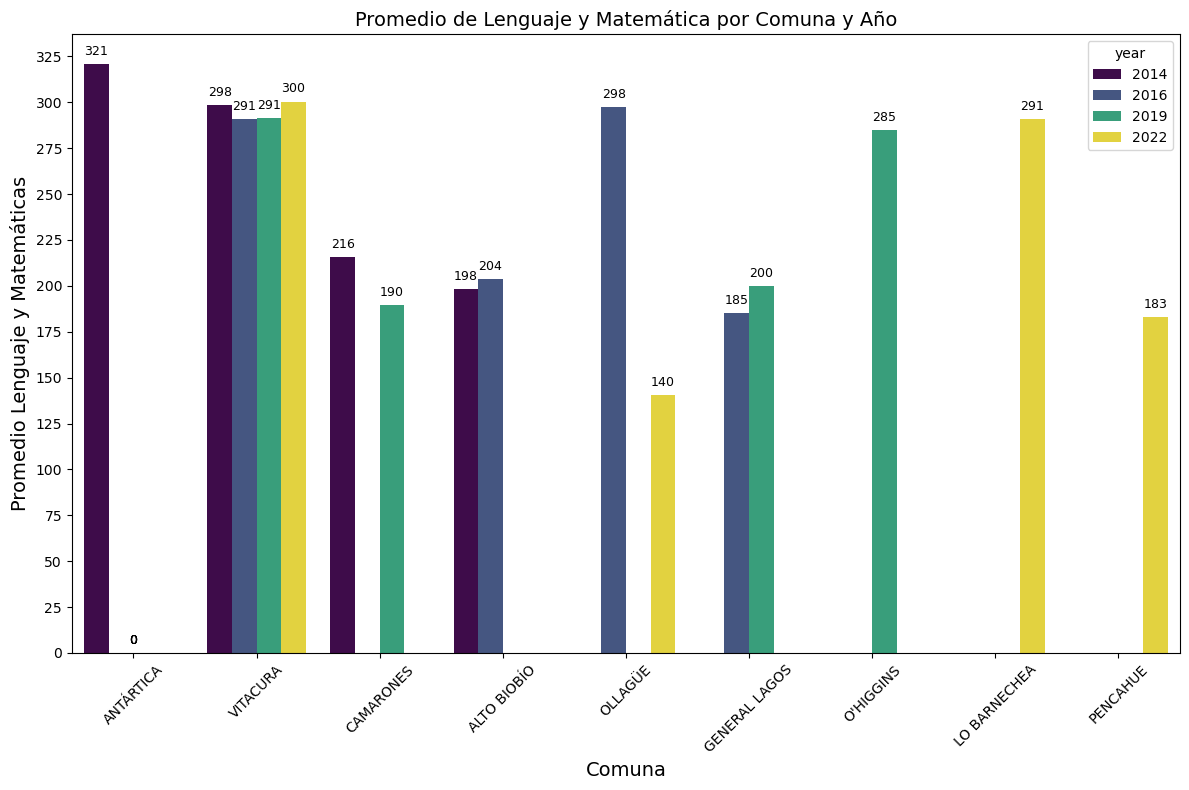

In [32]:
# se comparan distintos años y cursos
df_analisis = pd.concat([df14_comunas, df16_comunas_6, df19_comunas, df22_comunas_2], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

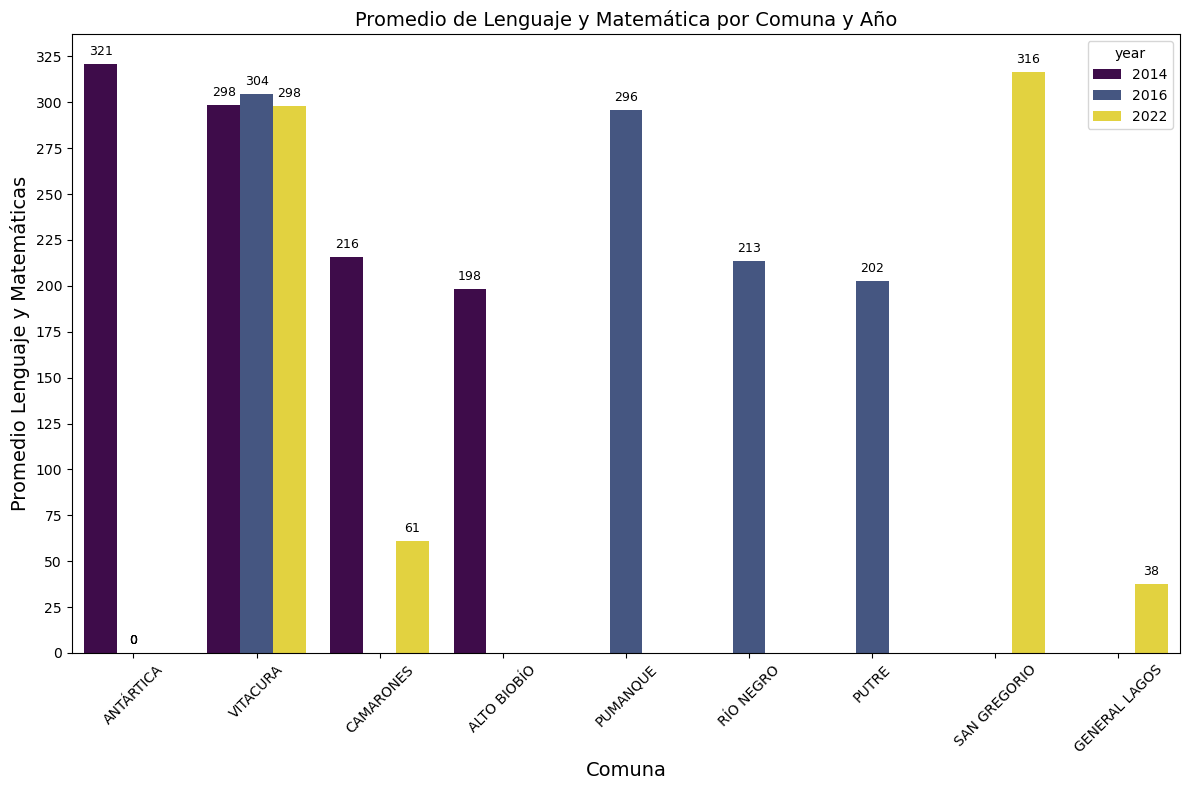

In [33]:
df_analisis = pd.concat([df14_comunas, df16_comunas_4, df22_comunas_4], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas. En 2014 se analiza un cuarto basico, en 2016 un sexto basico, en 2019 un octavo basico y en 2022 un segundo medio.

### Los resultados indican que:
1. Vitacura se encuentra en las comunas con mejores resultados en el simce en estos años.
2. La comuna de Antartica cuenta con los mejores resultados promedio en el año 2014.
3. Ollague tuvo el mejor resultado en 2016 pero en 2022 ademas se consagra como la comuna con peores resultados en los años estudiados.
4. Camarones, Alto Biobio y General Lagos cuentan como las peores comunas en dos años distintos.

## Conclusion:
Como conclusion podemos decir que si existe una diferencia significativa en los resultados SIMCE dependiendo de la comuna donde se realiza.

## Analisis(segundo grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas, donde en todos los años se analiza los cuartos basicos.

## Los resultados indican que:
Se comparte el punto 1, 2 y 4 con el primer grafico.

## Conclusion:
Podemos concluir que al analizar el mismo grado de educacion en distintos años comparte resultados con el grafico 1 en cuanto a las comunas con mejores y peores resultados promedio en las pruebas SIMCE.

# Pregunta 2 (no esta)

# Pregunta 3

Ya que queremos comparar cursos de un nivel parecido (debido a que comparar distintos cursos puede crear una gran varianza que puede confundir los datos), lo mejor seria utilizar los datos de los **cuartos basicos**.

In [45]:
prom22_4 = df22_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom16_4 = df16_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom14_4 = df14_4[['prom_lect4b_rbd','prom_mate4b_rbd']]

# ahora, unimos a todos

dfprom = pd.concat([prom22_4, prom16_4, prom14_4], axis=1)

dfprom.columns = [
    'Lectura_2022_4toB',
    'Matematicas_2022_4toB',
    'Lectura_2016_4toB',
    'Matematicas_2016_4toB',
    'Lectura_2014_4toB',
    'Matematicas_2014_4toB'
]

dfprom.head()

,Lectura_2022_4toB,Matematicas_2022_4toB,Lectura_2016_4toB,Matematicas_2016_4toB,Lectura_2014_4toB,Matematicas_2014_4toB
0,0.0,0.0,274.0,257.0,274.0,262.0
1,239.0,218.0,271.0,259.0,255.0,239.0
2,222.0,211.0,291.0,298.0,261.0,250.0
3,276.0,250.0,243.0,235.0,234.0,207.0
4,264.0,231.0,257.0,236.0,284.0,270.0


Primero, compararemos las **materias** por si solas.

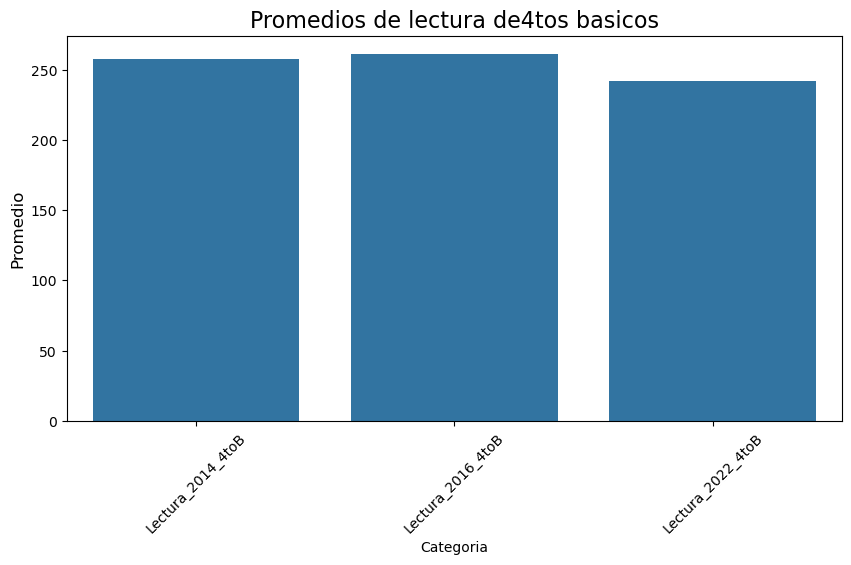

In [55]:
cols_lect = ['Lectura_2014_4toB','Lectura_2016_4toB','Lectura_2022_4toB']

prom_lect = dfprom[cols_lect].mean()
prom_4_lect = prom_lect.reset_index()
prom_4_lect.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_lect, x='Categoria', y='Promedio')
plt.title("Promedios de lectura de4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

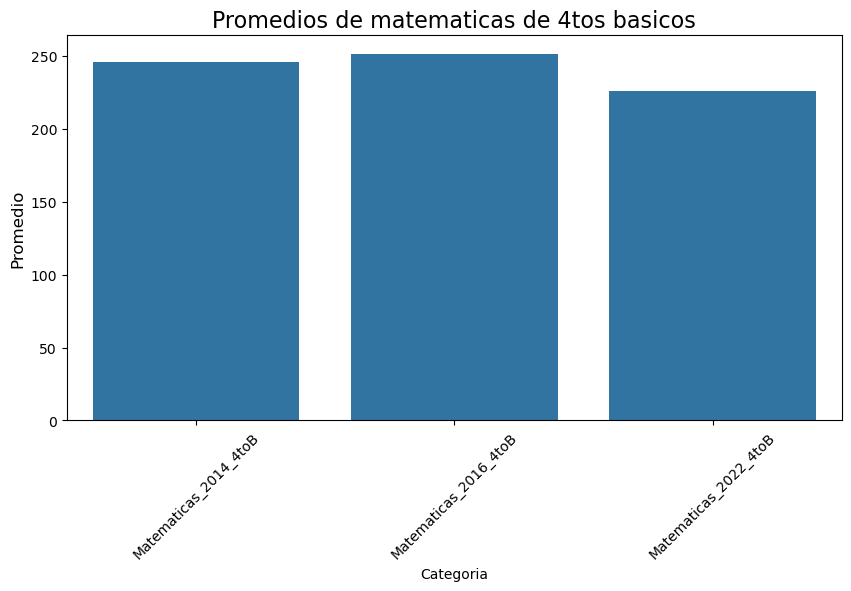

In [56]:
cols_mate = ['Matematicas_2014_4toB','Matematicas_2016_4toB','Matematicas_2022_4toB']

prom_mate = dfprom[cols_mate].mean()
prom_4_mate = prom_mate.reset_index()
prom_4_mate.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_mate, x='Categoria', y='Promedio')
plt.title("Promedios de matematicas de 4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()